## Exploratory Data Analysis on Black Friday Sales 
<img src="https://github.com/Gauravjha23/BlackFridaySell/blob/main/Designer.jpeg"><br>
### Dataset Overview
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
* The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.

* Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

What is Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop and understanding of data, by uncovering trends, relationships and patterns.

EDA is both a science and an art. On the one hand it requires the knowledge of statistics, visualization techniques and data analysis tools like Numpy, Pandas, Seaborn etc. On the other hand, it requires asking interesting questions to guide the investigation and interpreting numbers & figures to generate useful insights.

In this project, I have selected Black Friday Sales data from kaggle to explore and analyze the sales data on each product category, gender, martial status of customers etc.. We'll use the the python libraries pandas, matplotlib and seaborn to do exploratory data analysis on the Sales dataset.

Here's the outline of the steps we'll follow:

1. Downloading a dataset from an online source
2. Data preparation and cleaning with Pandas
3. Open-ended exploratory analysis and visualization
4. Asking and answering interesting questions
5. Summarizing inferences and drawing conclusions<br>

By the end this project we will get insights about the factors affecting the sales and some other facts about sale.

In [7]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [8]:
bfs=pd.read_csv("black_friday_sales.csv",index_col=0)

In [9]:
bfs.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,4.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,4.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4,0,8.0,8.0,16.0,7969


In [10]:
bfs.shape

(550068, 12)

## Reading information about data

In [17]:
bfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     550068 non-null  int64  
 1   product_id                  550068 non-null  object 
 2   gender                      550068 non-null  object 
 3   age                         550068 non-null  object 
 4   occupation                  550068 non-null  int64  
 5   city_category               550068 non-null  object 
 6   stay_in_current_city_years  550068 non-null  int64  
 7   marital_status              550068 non-null  int64  
 8   product_category_1          550068 non-null  float64
 9   product_category_2          550068 non-null  float64
 10  product_category_3          550068 non-null  float64
 11  purchase                    550068 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 54.6+ MB


In [5]:
bfs.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

In [6]:
bfs.duplicated().value_counts()

False    550068
Name: count, dtype: int64

We having total 550068 number of rows data including NaN value with no duplicated data. So, first task to convert the given data into useful data.

## Data Preprocessing

### gender: 

Column contains gender information with ['M','F'] values.

In [26]:
bfs.gender.unique()

array(['F', 'M'], dtype=object)

Text(0.5, 1.0, 'Gender Count')

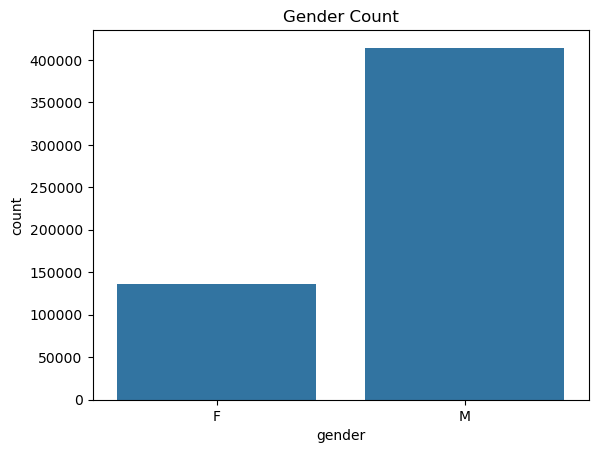

In [30]:
sns.countplot(x=bfs.gender)
plt.title('Gender Count')

In [14]:
bfs.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


### age:

Column contains Age category of customers.

In [15]:
bfs.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

We have total 7 age category customers data.

'0-17', '18-25', '26-35', '36-45', '46-50', '51-55' and '55+'.


Text(0.5, 1.0, 'Age Categories Count')

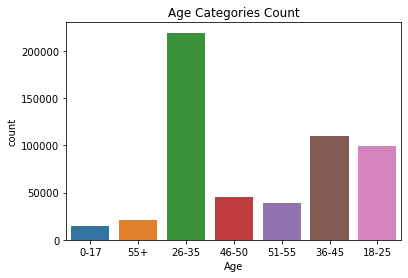

In [37]:
sns.countplot(bfs.Age)
plt.title('Age Categories Count')

### occupation:

Contains Occupation information of customers in the form of masked value format.

In [16]:
bfs.Occupation.unique(),len(bfs.Occupation.unique()),bfs.Occupation.dtype

(array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
         5, 14, 13,  6]),
 21,
 dtype('int64'))

We have 21 occupations type of customers 

### city_category

Contains information of cities category wise 

In [17]:
bfs.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

Text(0.5, 1.0, 'City Categories Count')

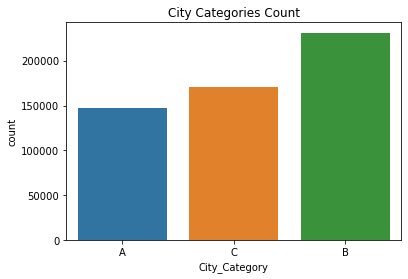

In [38]:
sns.countplot(bfs.City_Category)
plt.title('City Categories Count')

### stay_in_current_city_years:

Contains total number years indicating that the information of customers whose belonging to current city. 

In [18]:
bfs.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

We have customer who are staying in city from '0', '1', '2', '3', '4+' years.

We  can replace '4+' years to '4' so we can get excat number and we can assume that those customer are belonging to current city form 4 years are staying more than 4 years in the current city.

In [19]:
bfs.Stay_In_Current_City_Years=bfs.Stay_In_Current_City_Years.replace("4+",'4').astype(int)
bfs.Stay_In_Current_City_Years.unique()

array([2, 4, 3, 1, 0])

Here, we got 0, 1, 2, 3, 4 years which integer values.

### marital_status:

Contains information of customer that they are married or not. 

In [20]:
bfs.Marital_Status.unique()

array([0, 1])

Text(0.5, 1.0, 'Married v/s Unmarried')

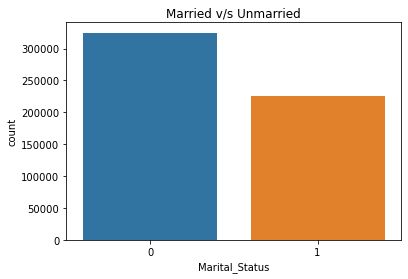

In [39]:
sns.countplot(bfs.Marital_Status,)
plt.title('Married v/s Unmarried')

We assume that **0** means the customer married status is **single** and **1** means the customer is **married**. 

### product_category:

Contains category wise product value. 



In [21]:
bfs.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


We have three product categories columns, product_category_1, product_category_2 and product_category_3 is nothing but the different varities of products.

Ex.:

We can assume that **product_category_1 having Electronics items**, **product_category_2 having Cloths & Grarments**, **product_category_3 and having Grocery**.

In [23]:
bfs[['Product_Category_1','Product_Category_2','Product_Category_3']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Product_Category_1  550068 non-null  int64  
 1   Product_Category_2  376430 non-null  float64
 2   Product_Category_3  166821 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 12.6 MB


Notice that product category having NaN values or empty values. Let's try to fill them by seeing another columns info.

In [24]:
bfs.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


See we have two columns Gender and occupation. By seeing these two columns we can analyse that which column giving us a useful values to fill the nan values of product categories.

Ex.:

* By seaing the '**age**' column we can analyze that which product category are mostely used by the perticular age of customer and we can fill that category value inplace of nan values.
* By seaing the '**occupation**' column we can analyze that which product category are mostely used by the perticular customers depends on their occupation and we can fill that category value inplace of nan values.

In the next steps let's see that which column giving us most useful values.

In [26]:
a=bfs.groupby('Age')['Product_Category_2'].agg(pd.Series.mode)
b=bfs.groupby('Age')['Product_Category_3'].agg(pd.Series.mode)
c=bfs.groupby('Occupation')['Product_Category_2'].agg(pd.Series.mode)
d=bfs.groupby('Occupation')['Product_Category_3'].agg(pd.Series.mode)# mode gives us a most repeated value

In [27]:
a

Age
0-17     4.0
18-25    8.0
26-35    8.0
36-45    8.0
46-50    8.0
51-55    8.0
55+      8.0
Name: Product_Category_2, dtype: float64

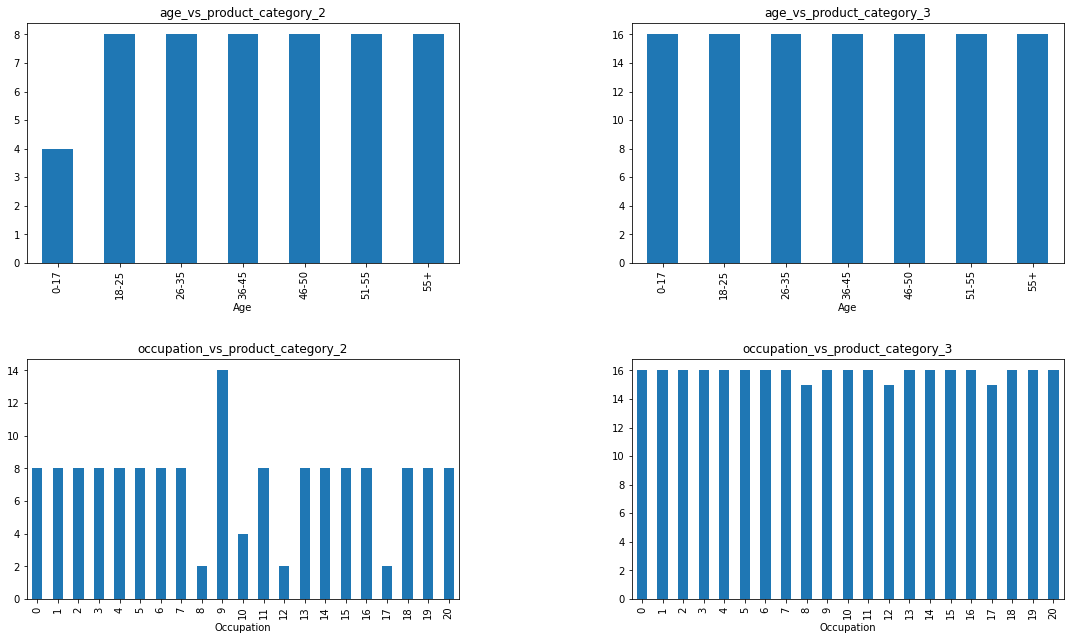

In [28]:
plt.figure(figsize=(18,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2,2,1)
a.plot(kind='bar',title="age_vs_product_category_2")
plt.subplot(2,2,2)
b.plot(kind='bar',title="age_vs_product_category_3")
plt.subplot(2,2,3)
c.plot(kind='bar',title="occupation_vs_product_category_2")
plt.subplot(2,2,4)
d.plot(kind='bar',title="occupation_vs_product_category_3")
plt.show()

# here we trying to fill only product_category_2 and product_category_3 NaN values because product_category_1 having 0 NaN values.

By comparing both '**age**' and '**occupation**' colums we can see that **on the basis of occupation we are getting more and differnt Product_categories which are mostly repeated.** 

So, **we can fill the nan product_category values corresponding to customer occupation.**

In the next step to fill this NaN values let's try to write function which we can use for each product_category.

* Insted of repeat the code for each product_category we can use code reusability concept here.

In [29]:
def fill_nan_category(category_colunm):
    x=bfs.groupby('Occupation')[category_colunm].agg(pd.Series.mode)
    for i,j in zip(x.index,x):
        bfs.loc[bfs['Occupation']==i,category_colunm]=bfs.loc[bfs['Occupation']==i,category_colunm].fillna(j)

In [31]:
fill_nan_category('Product_Category_1')
fill_nan_category('Product_Category_2')
fill_nan_category('Product_Category_3')
bfs.Product_Category_1=bfs.Product_Category_1.astype(float)

In [32]:
bfs[['Product_Category_1','Product_Category_2','Product_Category_3']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Product_Category_1  550068 non-null  float64
 1   Product_Category_2  550068 non-null  float64
 2   Product_Category_3  550068 non-null  float64
dtypes: float64(3)
memory usage: 12.6 MB


Here, see we succesfully filled the NaN values with proper data. 
##### **In this concept I hope you understood how we can fill the NaN values by analysing and compering corresponding columns. And where we can use the code resuability concept.**

### purchase:

Contains the purchse value for product by customer.

In [33]:
bfs.Purchase.unique(),bfs.Purchase.isnull().count()

(array([ 8370, 15200,  1422, ...,   135,   123,   613]), 550068)

In [34]:
bfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  float64
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 50.4+ MB


In [35]:
bfs.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,4.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,4.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4,0,8.0,8.0,16.0,7969


In [36]:
bfs.to_csv('./bfs_clean_data.csv') # Saivng cleaned dataset in output directory.

Therefore, we cleaned our data successfully without losing single value, we got total 550068 values.

If you have more cleaning ideas on this dataset place in comments or in Diccussion.

## Data Visualization

In [58]:
bfs.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,4.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,4.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4,0,8.0,8.0,16.0,7969


### 1) Find the density of purchase in which most of purchase took place. Also Check Distribution and Outliers of 'purchase'

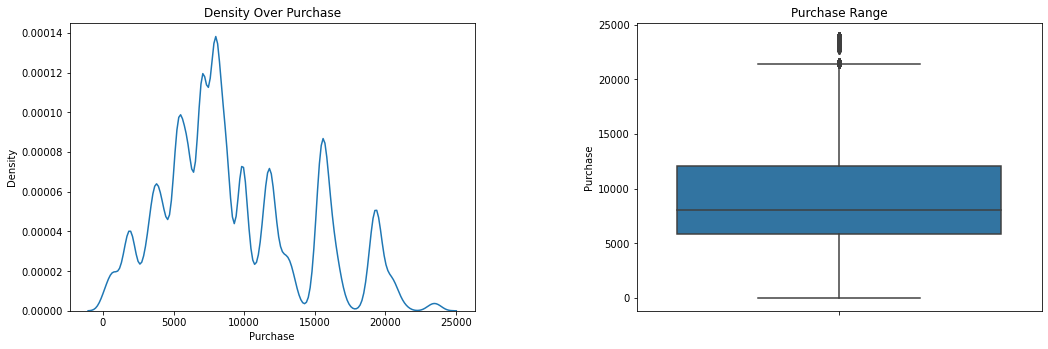

In [42]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(1,2,1)
plt.title('Density Over Purchase')
sns.kdeplot('Purchase',data=bfs)
plt.subplot(1,2,2)
sns.boxplot(y='Purchase',data=bfs)
plt.title('Purchase Range')
plt.show()

We observed that most of the purcahse value is between 5000 to 10000.  

## Get purchase details of Male and Female customers? {'M','F'}.

#### 2) Find which kind of customer visits more frequently ? Male or Female?{'M','F'}.

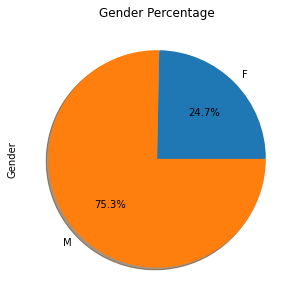

In [44]:
bfs.groupby('Gender').agg({'Gender':'count'}).Gender.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.title('Gender Percentage')
plt.show()


We see that 75% Male customers visits us frequently.

#### 3) Purchase Distribution of 'Male' and 'Female' customers.

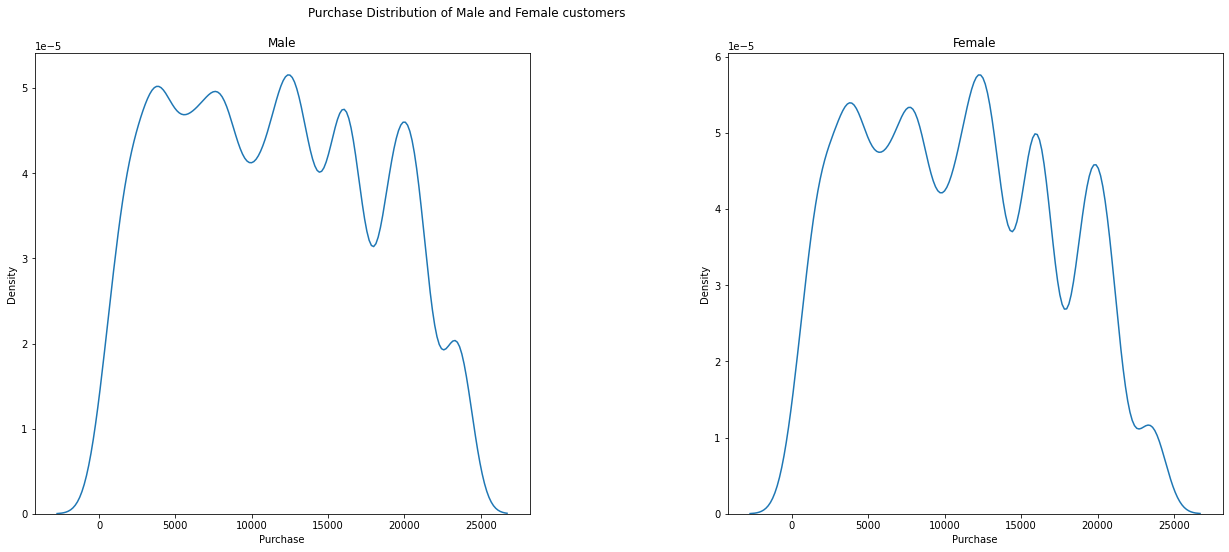

In [51]:
plt.figure(figsize=(15,8))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
ma=bfs[bfs['Gender']=='M'].value_counts('Purchase').reset_index()
fe=bfs[bfs['Gender']=='F'].value_counts('Purchase').to_frame()
plt.subplot(1,2,1)
sns.kdeplot('Purchase',data=ma).set_title('Male')
plt.subplot(1,2,2)
sns.kdeplot('Purchase',data=fe).set_title('Female')
plt.suptitle('Purchase Distribution of Male and Female customers')
plt.show()

#### 4) Find which kind of customer purchasing more ? Male or Female?{'M','F'}.

,Gender,Purchase
0,F,1186232642
1,M,3909580100


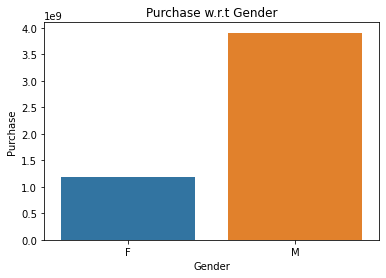

In [55]:
p=bfs.groupby('Gender').agg({'Purchase':sum}).reset_index()
sns.barplot(x='Gender',y='Purchase',data=p)
plt.title('Purchase w.r.t Gender')
p

We observed that 'Male' customers are purchasing more.

#### 5) Find which Product customer buying most by seaing product_id.

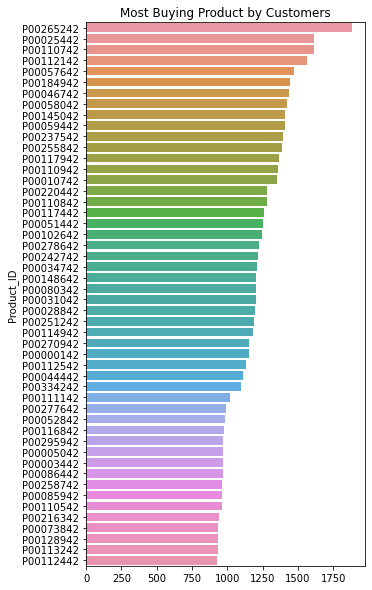

In [59]:
p_id=bfs.value_counts('Product_ID').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.title('Most Buying Product by Customers')
plt.show()

Here are the 'top 50' product_id's which are customers buying most.

#### 6) Find 'sub_product' which is selling most from each product_category and which customer category buying that product most?{'M','F'}.

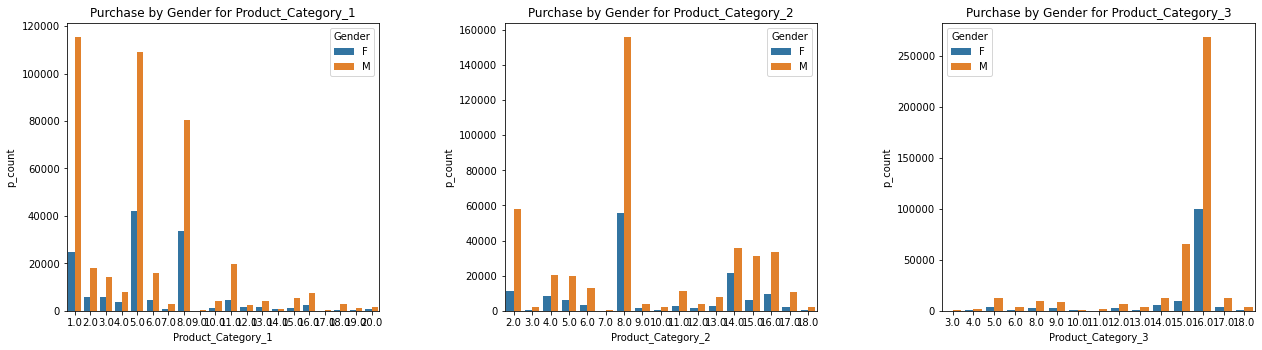

In [61]:
c1=bfs.groupby('Gender')['Product_Category_1'].value_counts().to_frame().rename(columns={"Product_Category_1":'p_count'}).reset_index()
c2=bfs.groupby('Gender')['Product_Category_2'].value_counts().to_frame().rename(columns={"Product_Category_2":'p_count'}).reset_index()
c3=bfs.groupby('Gender')['Product_Category_3'].value_counts().to_frame().rename(columns={"Product_Category_3":'p_count'}).reset_index()
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(1,3,1)
sns.barplot(x='Product_Category_1',y='p_count',hue='Gender',data=c1).set_title('Purchase by Gender for Product_Category_1')
plt.subplot(1,3,2)
sns.barplot(x='Product_Category_2',y='p_count',hue='Gender',data=c2).set_title('Purchase by Gender for Product_Category_2')
plt.subplot(1,3,3)
sns.barplot(x='Product_Category_3',y='p_count',hue='Gender',data=c3).set_title('Purchase by Gender for Product_Category_3')
plt.show()

Here we can see, we have three product_categories and on x-axis we having some values that are nothing but sub_products of that product_category in masked format.

The graph showing that the sub_product count and the two colours bar are showing that the customer category count wich are buying that product.

We observed that there are some sub_product's selling count is high and most of the 'Male' customers buying that product.

## Get purchase details of 'Married' and 'UnMarried' customers.{'UnMarried': 0, 'Married': 1}

#### 7) Purchase Distribution of Married and UnMarried customers.

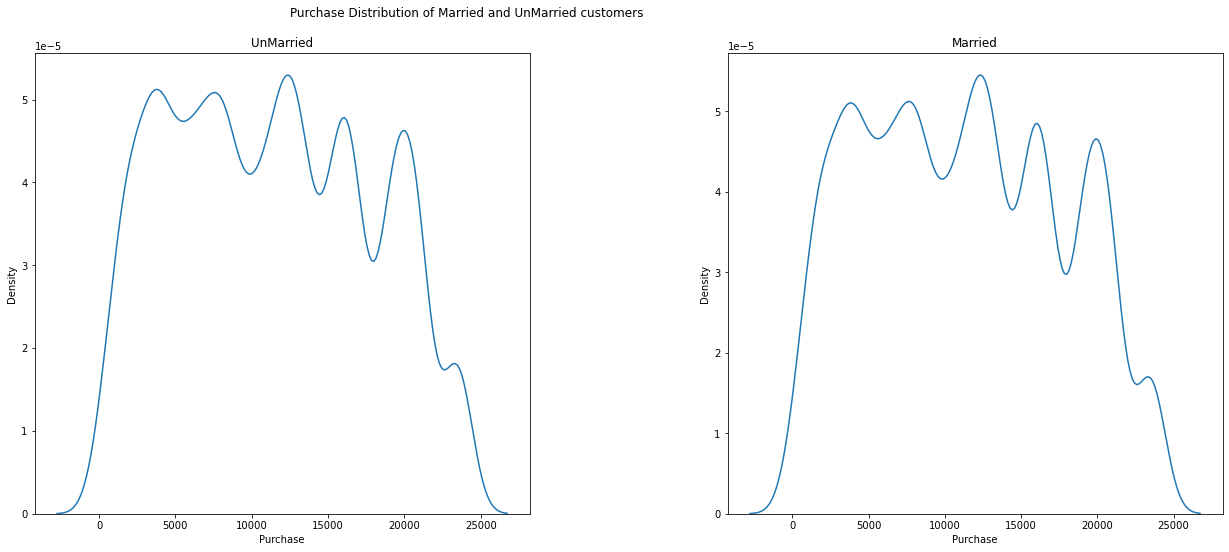

In [64]:
UM_P=bfs[bfs['Marital_Status']==0].value_counts('Purchase').to_frame()
M_P=bfs[bfs['Marital_Status']==1].value_counts('Purchase').to_frame()
plt.figure(figsize=(15,8))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(1,2,1)
sns.kdeplot('Purchase',data=UM_P).set_title('UnMarried')
plt.subplot(1,2,2)
sns.kdeplot('Purchase',data=M_P).set_title('Married')
plt.suptitle('Purchase Distribution of Married and UnMarried customers')
plt.show()

Purchase distribution of both 'Married' and 'UnMarried' customers are quitely same.

#### 8) Find which customer visits more frequently ? UnMarried or Married? {'UnMarried': 0, 'Married': 1}.

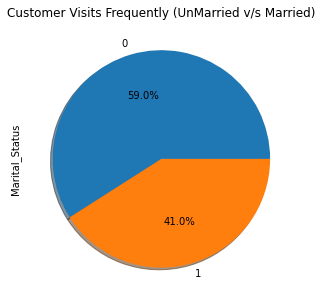

In [65]:
bfs.groupby('Marital_Status').agg({'Marital_Status':'count'}).Marital_Status.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.title('Customer Visits Frequently (UnMarried v/s Married)')
plt.show()

We observed that 'UnMarried' customers Visiting us frequently. And we have 'Married' customer in large amount as well.

#### 9) Find which customer purchasing more (Married or UnMarried) and Top 10 products purcahsed by them.

In [42]:
bfs.head(1)

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,4.0,16.0,8370


,gender,marital_status,purchase
0,F,0,684154127
1,F,1,502078515
2,M,0,2324773320
3,M,1,1584806780


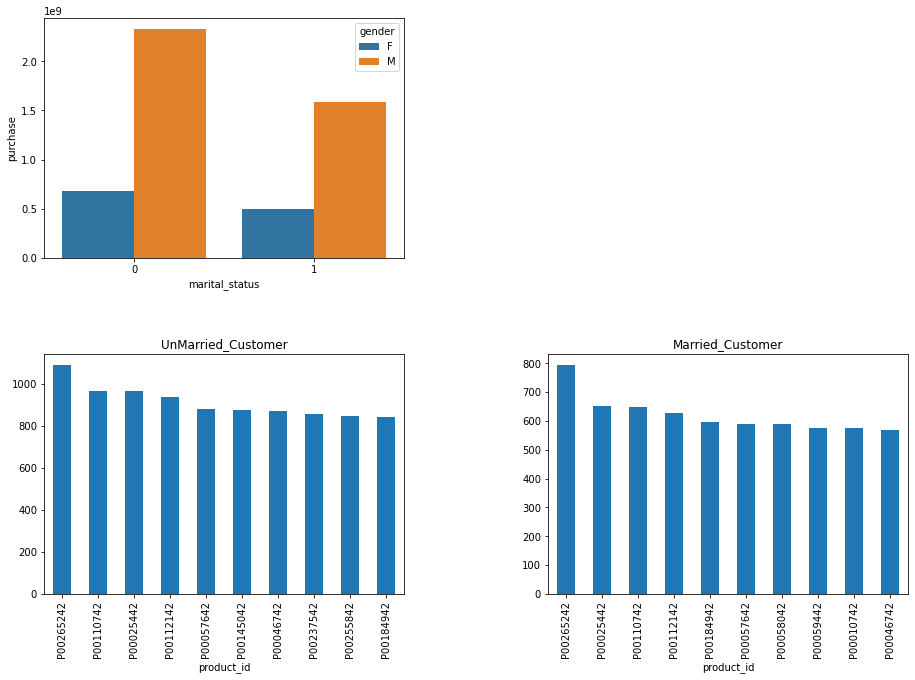

In [43]:
M_UM_P=bfs.groupby(['Gender','Marital_Status']).agg({'Purchase':sum}).reset_index()
UM=bfs[bfs['Marital_Status']==0].value_counts('Product_ID').nlargest(10)
M=bfs[bfs['Marital_Status']==1].value_counts('Product_ID').nlargest(10)
plt.subplots_adjust(left=1,
                    bottom=1,
                    right=3,
                    top=3,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2,2,1)
sns.barplot(x='marital_status',y='purchase',hue='gender',data=M_UM_P).set_title('Purchase Count w.r.t Gender and Marital St')
plt.subplot(2,2,3)
UM.plot(x=UM.index,y=UM,kind='bar',title='UnMarried_Customer')
plt.subplot(2,2,4)
M.plot(x=M.index,y=M,kind='bar',title='Married_Customer')
M_UM_P

In the above plot we can see that 'UnMarried' customers purchasing more than the 'Married' customers.

And BarPlot showing that top 10 Product Id's purshased by them frequently.

## Summary:
In the Given dataset. I explored and learned many things like,

* How to fill NaN values.

* Where we can use the concept of code reusability.

* In the process of cleaning the dataset I used Pandas and Numpy libraries. Using pandas and numpy I removed unwanted(useless) data and created new data frames and got useful data for my research. After cleaning my data I used Seaborn and Matplotlib libraries to read my data by visualizing it. I created questions regarding my research I tried to solve it by visualizing and applying conditions.

* Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products. By seeing this EDA we can fulfill this requirements.

## Future Work
* We can apply Machine Learning algorithms to predict sales.
* We can use SMOTE to handle unbalanced data in some of the columns like age.
* We can deploy the project using gradio.

## References

* Medium: https://medium.com/code-heroku/introduction-to-exploratory-data-analysis-eda-c0257f888676
* Kaggle: https://www.kaggle.com/code/spscientist/a-simple-tutorial-on-exploratory-data-analysis